In [1]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import special
import arviz as az
import pandas as pd
from scipy import stats
import seaborn as sns

# from pymc3.distributions.distribution import Discrete
# from aesara.tensor.random.basic import RandomVariable

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.


Could not locate executable g77
Could not locate executable f77
Could not locate executable ifort
Could not locate executable ifl
Could not locate executable f90
Could not locate executable DF
Could not locate executable efl
Could not locate executable gfortran
Could not locate executable f95
Could not locate executable g95
Could not locate executable efort
Could not locate executable efc
Could not locate executable flang
don't know how to compile Fortran code on platform 'nt'


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
pm.__version__

'4.1.1'

In [7]:
df3 = pd.read_csv('testing_data_poisson.csv',index_col=0)

In [8]:
df3.head(1)

,values
0,5


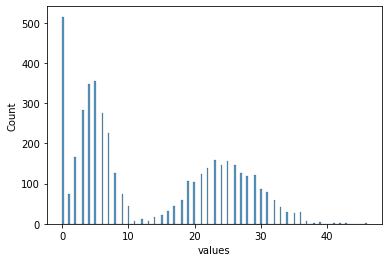

In [10]:
sns.histplot(data=df3, x="values", bins=200)
plt.show()

In [11]:
y = df3["values"].values

In [12]:
y[:2]

array([5, 6], dtype=int64)

In [15]:
with pm.Model() as model:
    mu1 = pm.Uniform('mu1', lower=0, upper=15)
    mu2 = pm.Uniform('mu2', lower=10, upper=35)
    
    pois1 = pm.Poisson.dist(mu=mu1)  ## need to use '.dist' otherwise will get an error
    pois2 = pm.Poisson.dist(mu=mu2)
    
    zero_inflated = pm.DiracDelta.dist(0)

    w = pm.Dirichlet('w', a=np.array([1, 1 ,1]))

    like = pm.Mixture('mixture', w=w, comp_dists = [zero_inflated,pois1,pois2], observed=y)


In [16]:
with model:
    inf_fish = pm.sample(500, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu1, mu2, w]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 4536 seconds.
